<h1>PART I: WEB SCRAPING</h1>

* please refer to 'Web Scrapping for Sephora.ipynb' but it takes more than hours to get all data!!!!!!

<h1>PART II: TEXT MINING</h1>

In [1]:
import pandas as pd
df_non = pd.read_csv('non_allure.csv')
df_allure = pd.read_csv('all_allure.csv')
df = df_allure.append(df_non)
# df

* Get all reviews for all products
* return a Dictionary
* Product ID as keys, a list of users who provided reviews for the product as values

In [2]:
def get_all_user(texts):#return all user id from each product (product0, product1, .......)
    user_dict = dict()
    for i in range(len(texts.index)):
        user_ids = list(eval(texts['all_reviews'].iloc[i]).keys())
        user_dict[i] = user_ids   
    return user_dict

* For each product, divide its number of reviews into 10 slices (10%, 20%,...100%)

In [4]:
def get_user_percentage(texts):
    #for each product(0,1,....), determine what's 0%-10% of its reviews, what's 10%-20% of its reviews, etc.
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    import nltk
    from nltk import sent_tokenize,word_tokenize
    analyzer = SentimentIntensityAnalyzer()
    percentage_list = dict()
    user_dict = dict()
    for i in range(len(texts.index)):
        review_length = len(eval(texts['all_reviews'].iloc[i]).keys()) # number of user's review
        user_ids = list(eval(texts['all_reviews'].iloc[i]).keys())
        user_dict[i] = user_ids
        percentage_list_small = list()
        for j in range(10):
            if j == 0:
                prev_review_length = 0
                aft_review_length = max(int((j+1)*review_length/10),1)
                percentage_list_small.append([prev_review_length, aft_review_length])
            else:
                prev_review_length = int((j)*review_length/10)+1
                aft_review_length = max(int((j+1)*review_length/10),prev_review_length)
#                
                percentage_list_small.append([prev_review_length, aft_review_length])
        percentage_list[i] = percentage_list_small
    return user_dict,percentage_list

In [6]:
# get_user_percentage(df)

* Calculate the Vader score for each slice, from 10%, 20% to 100%

In [5]:
def compare_compound(texts):
    from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
    import nltk
    from nltk import sent_tokenize,word_tokenize
    analyzer = SentimentIntensityAnalyzer()
    percentage_list = dict()
    customer,percentages = get_user_percentage(texts)
    for i in range(len(texts.index)):
        all_compound_values = list()
        
        for j in range(10): # percentage 0%-10%, 10%-20%, ...
            #0%-10% of reviews, for each product, compute its compound values
            #then 10%-20%, for each product, compute its compound values
            #.....
            compound = 0
            review = eval(texts['all_reviews'].iloc[i]) #transform string to dictionary
            each_per_review_total = list()
            for k in range(percentages[i][j][1]):
                customer_id = customer[i][k]
                per_review = review[customer_id][2]
                each_per_review_total.append(per_review)
            
            for sentence in each_per_review_total:
                try:
                    vs = analyzer.polarity_scores(sentence)
                    compound += vs['compound']/(len(each_per_review_total))
                except:
                    pass
                
            all_compound_values.append(compound)
        percentage_list[i] = all_compound_values

    import pandas as pd
    import numpy as np
    df3 = pd.DataFrame(percentage_list).T

    return df3

In [7]:
#dont run this!!! It takes an hour!!
percentage_df = compare_compound(df)

In [9]:
column_names = [f'{j}0% percentage' for j in range(1,11)]
percentage_df.columns = column_names

* Populate 100% Vader score for each product into df (prepare for further modeling)

In [10]:
df['vader_100_score'] = percentage_df['100% percentage']
df.to_csv('all_with_100_vader.csv')

In [20]:
percentage_df.to_csv('percentage_df_total_1400.csv',index=False)

In [19]:
# percentage_df

,10% percentage,20% percentage,30% percentage,40% percentage,50% percentage,60% percentage,70% percentage,80% percentage,90% percentage,100% percentage
0,0.719739,0.711500,0.706347,0.707237,0.709310,0.707229,0.702496,0.696181,0.697227,0.695798
1,0.342933,0.556762,0.602789,0.598319,0.587488,0.619823,0.601098,0.587871,0.582425,0.574662
2,0.500520,0.500335,0.519446,0.519964,0.530518,0.529445,0.537543,0.538444,0.541083,0.545100
3,0.495921,0.494757,0.556329,0.558353,0.534384,0.551915,0.565614,0.550202,0.556781,0.568927
4,0.511706,0.649016,0.674553,0.689288,0.704955,0.711570,0.718154,0.721910,0.725638,0.729269
5,0.665600,0.621225,0.655555,0.679580,0.689123,0.699649,0.704461,0.700578,0.696238,0.682117
6,0.822914,0.753916,0.688079,0.697787,0.704185,0.710442,0.716446,0.722878,0.736286,0.743622
7,0.563039,0.574542,0.609664,0.612343,0.612888,0.617632,0.617370,0.617589,0.619183,0.621797
8,0.573757,0.556634,0.582450,0.511659,0.499645,0.482852,0.487294,0.504067,0.513643,0.516609
9,0.809356,0.755059,0.775439,0.779120,0.778789,0.779445,0.785710,0.777403,0.781314,0.783790


* How much reviews does a customer need to read, so that they can get a good enough idea about the product (as if they have read through all the reviews?)

* Plot the partial Vader score's difference with 100% Vader score, for 10%, 20%, 30% ... of reviews

In [22]:
# to save your time, we provide a csv that can directly get percentage_df
percentage_df=pd.read_csv('percentage_df_total_1400.csv')

C:\Users\miley\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


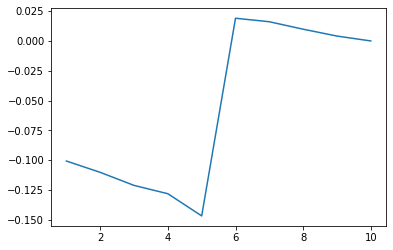

In [24]:
error_rate_dict = {}
for i in range(len(df.index)):
    error_rate_list = []

    for j in range(1,11):
        error_rate = (percentage_df[f'{j}0% percentage'].iloc[i]-percentage_df['100% percentage'].iloc[i])/percentage_df['100% percentage'].iloc[i]
        error_rate_list.append(error_rate)
    error_rate_dict[i] = error_rate_list
error_df = pd.DataFrame(error_rate_dict).T
error_df.columns = [f'{j}0% percentage' for j in range(1,11)]
avg_error = []
for j in range(1,11):
    avg_error_j = error_df[f'{j}0% percentage'].mean()
    avg_error.append(avg_error_j)
import matplotlib.pyplot as plt
print(plt.plot([j for j in range(1,11)], avg_error))

* Plot the partial Vader score's correlation with 100% Vader score, for 10%, 20%, 30% ... of reviews

In [25]:
import numpy as np
corr_list = []
j_list = [f'{j}0% percentage' for j in range(1,11)]
for j in range(1,11):
    corr = np.corrcoef(percentage_df[f'{j}0% percentage'],percentage_df['100% percentage'])[0,1]
    corr_list.append(corr)
import matplotlib.pyplot as plt
corr_df = pd.DataFrame(corr_list)
j_df = pd.DataFrame([j for j in range(1,11)])
corr_df['j']=j_df
corr_df.columns = ['Correlation','j']

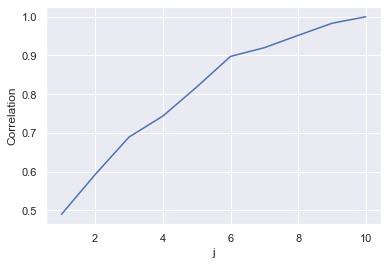

In [26]:
import seaborn as sns
sns.set(style="darkgrid")
sns.lineplot(x="j", y="Correlation",
             markers=True, dashes=False,
             data=corr_df)

<h1>PART III: DATA CLEANING AND VISUALIZATION
</h1>

<h3>1） WORDCLOUD</h3>

using all reviews of all products

In [317]:
def get_all_review_as_nested_list(texts): #return list of all allure-product's reviews
    all_review = list()
    for i in range(len(texts.index)):#for each product
        review_li = list(eval(texts['all_reviews'].iloc[i]).values())
        for j in review_li:
            if j[2] is not None:
                all_review.append(j[2])
    return all_review

In [318]:
all_review_list=get_all_review_as_nested_list(df)

In [319]:
words = ''.join(all_review_list)

In [342]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask = np.array(Image.open(path.join(d, "beauty.png")))

In [344]:
# modules for generating the word cloud
from os import path, getcwd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

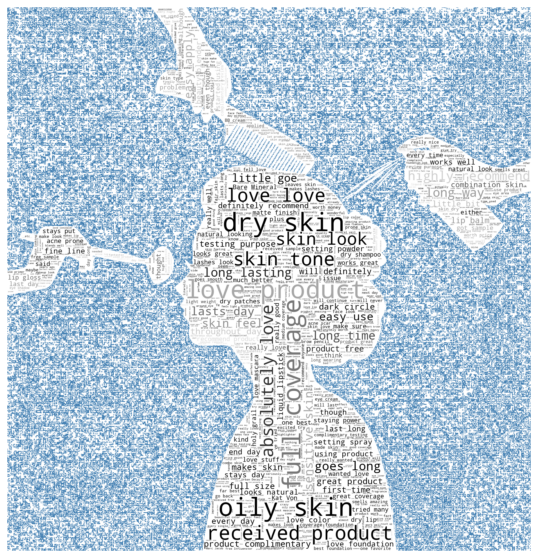

In [345]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
mask = np.array(Image.open(path.join(d, "beauty.png")))
wc = WordCloud(background_color="white", max_words=1000, mask=mask,
               max_font_size=90, random_state=42, contour_width=1, contour_color='steelblue')
wc.generate(words)
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,10])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

<h3>
2）Find out the average ratings and helpfulness of different membership levels
</h3>

In [8]:
import pandas as pd
df=pd.read_csv('all_with_100_vader.csv')

In [306]:
#get the user level, rating and helpfulness of all reviews
#it may take 3 minutes
review_list=list()
for i in range(len(df.index)):
    review = eval(df['all_reviews'][i]) 
    for j in list(review.values()):
        rating=j[0]
        level = j[3]
        if level != None:
            level = level[7:].lower()
        else:
            level = 'guest'
        helpfulness=j[4]
        review_list.append((level,rating,helpfulness))

In [307]:
#drop extremes and calculate average ratings and helpfulness of different membership levels
df_review=pd.DataFrame(review_list,columns=['level','rating','helpfulness'])
df_r=df_review[(df_review['helpfulness'] != 0) & (df_review['helpfulness'] != 1)].dropna()
avg_r_rating=df_r[df_r['level']=='rouge']['rating'].mean()
avg_r_help=df_r[df_r['level']=='rouge']['helpfulness'].mean()
avg_v_rating=df_r[df_r['level']=='vib']['rating'].mean()
avg_v_help=df_r[df_r['level']=='vib']['helpfulness'].mean()
avg_b_rating=df_r[df_r['level']=='bi']['rating'].mean()
avg_b_help=df_r[df_r['level']=='bi']['helpfulness'].mean()
avg_g_rating=df_r[df_r['level']=='guest']['rating'].mean()
avg_g_help=df_r[df_r['level']=='guest']['helpfulness'].mean()
df_stats = pd.DataFrame({'level': ['guest','bi','vib','rouge'],
                   'avg_rating': [avg_g_rating,avg_b_rating,avg_v_rating,avg_r_rating], 
                   'avg_helpfulness': [avg_g_help,avg_b_help,avg_v_help,avg_r_help]})

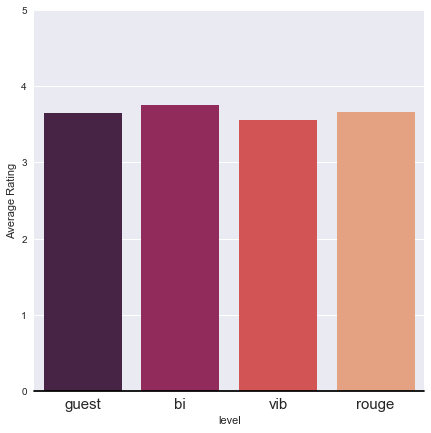

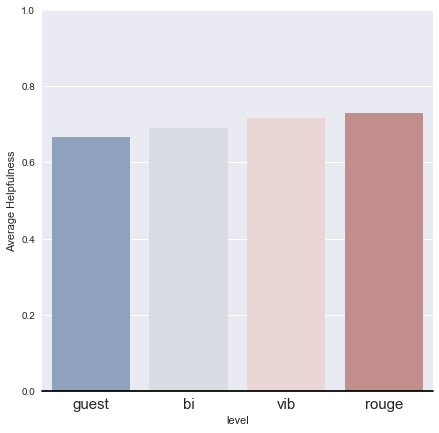

In [308]:
#plot average ratings and helpfulness of different membership levels
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

f, ax1 = plt.subplots(1, 1, figsize=(7, 7), sharex=True)
plt.xticks(fontsize=15)

plt.ylim(0.0,5.0)
r=sns.barplot(x=df_stats['level'], y=df_stats['avg_rating'], palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Average Rating")

sns.despine(bottom=True)

f, ax2 = plt.subplots(1, 1, figsize=(7, 7), sharex=True)
plt.xticks(fontsize=15)

plt.ylim(0.0,1.0)
sns.barplot(x=df_stats['level'], y=df_stats['avg_helpfulness'], palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Average Helpfulness")

sns.despine(bottom=True)

In [86]:
df.head()

,Unnamed: 0,product_id,brand_name,product_name,category,subcategory,loves,price,total_review,avg_rating,recommended_count,onestar_count,twostar_count,threestar_count,fourstar_count,fivestar_count,all_reviews,vader_100_score
0,0,P45874456,FENTY BEAUTY by Rihanna,Mattemoiselle Plush Matte Lipstick,Makeup,Lip,321206,$18.00,2215,4.3869,1922,93,102,163,354,1503,"{'109124182': [5, 'Bye Train Bleu, Hello Grise...",0.695798
1,1,P437290,Charlotte Tilbury,Charlotte's Genius Under Eye & Face Magic Sett...,Makeup,Face,15496,$45.00,66,4.2576,54,3,6,3,13,41,"{'119025960': [5, 'The review should be on per...",0.574662
2,2,P263504,Urban Decay,All Nighter Long-Lasting Makeup Setting Spray,Makeup,Face,489054,$33.00,9548,4.4152,3026,472,361,518,1577,6620,"{'66793065': [5, 'DONT SLEEP ON THIS', 'THIS S...",0.545100
3,3,P427517,Benefit Cosmetics,BADgal BANG! Volumizing Mascara,Makeup,Eye,48109,$25.00,4372,3.7591,2998,546,447,520,860,1999,"{'110307978': [4, None, ""I agree with what mos...",0.568927
4,4,P424149,HUDA BEAUTY,Desert Dusk Eyeshadow Palette,Makeup,Eye,239821,$65.00,1971,4.4434,1704,81,89,113,280,1408,"{'104577257': [5, 'so creamy!', 'As a make up ...",0.729269


* drop useless columns for modeling and visualization

In [9]:
def dataprocess(data):
    import pandas as pd
    data.set_index('product_id',inplace=True)
    data = data.drop(['Unnamed: 0','all_reviews'],axis=1)
    for i, row in data.iterrows():
        price = data['price'][i]
        if '(' in price:
            price = price.split('(')[0]
        data['price'][i]= price[1:] 
    data['price']=data['price'].astype(float)
    data['onestar_pct']=data['onestar_count']/data['total_review']
    data['twostar_pct']=data['twostar_count']/data['total_review']
    data['threestar_pct']=data['threestar_count']/data['total_review']
    data['fourstar_pct']=data['fourstar_count']/data['total_review']
    data['fivestar_pct']=data['fivestar_count']/data['total_review']
    data=data.drop(['onestar_count','twostar_count','threestar_count','fourstar_count','fivestar_count'],axis=1)
    return data

In [10]:
#it may take 3 min
df_all=dataprocess(df)
df_all.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,brand_name,product_name,category,subcategory,loves,price,total_review,avg_rating,recommended_count,vader_100_score,onestar_pct,twostar_pct,threestar_pct,fourstar_pct,fivestar_pct
product_id,,,,,,,,,,,,,,,
P45874456,FENTY BEAUTY by Rihanna,Mattemoiselle Plush Matte Lipstick,Makeup,Lip,321206,18.0,2215,4.3869,1922,0.695798,0.041986,0.046050,0.073589,0.159819,0.678555
P437290,Charlotte Tilbury,Charlotte's Genius Under Eye & Face Magic Sett...,Makeup,Face,15496,45.0,66,4.2576,54,0.574662,0.045455,0.090909,0.045455,0.196970,0.621212
P263504,Urban Decay,All Nighter Long-Lasting Makeup Setting Spray,Makeup,Face,489054,33.0,9548,4.4152,3026,0.545100,0.049434,0.037809,0.054252,0.165165,0.693339
P427517,Benefit Cosmetics,BADgal BANG! Volumizing Mascara,Makeup,Eye,48109,25.0,4372,3.7591,2998,0.568927,0.124886,0.102242,0.118939,0.196706,0.457228
P424149,HUDA BEAUTY,Desert Dusk Eyeshadow Palette,Makeup,Eye,239821,65.0,1971,4.4434,1704,0.729269,0.041096,0.045155,0.057331,0.142060,0.714358


In [11]:
df_all['allure']=0
df_all.loc[:240,'allure']=1

In [42]:
df_normal= df_all[df_all['total_review']>=100]

<h3> 3）top 15 brands with highest ratings</h3>

In [43]:
def brand_avg_rating(text): #return a tuple of top 15 brands with highest average ratings
    brand_name_list = list(text['brand_name'].unique())
    brand_avg_rating = list()
    for i in brand_name_list:
        avg_rating = (text[text['brand_name'] == i]['avg_rating'].sum())/(text[text['brand_name'] == i]['avg_rating'].count())
        brand_avg_rating.append((i,avg_rating))
    return brand_avg_rating

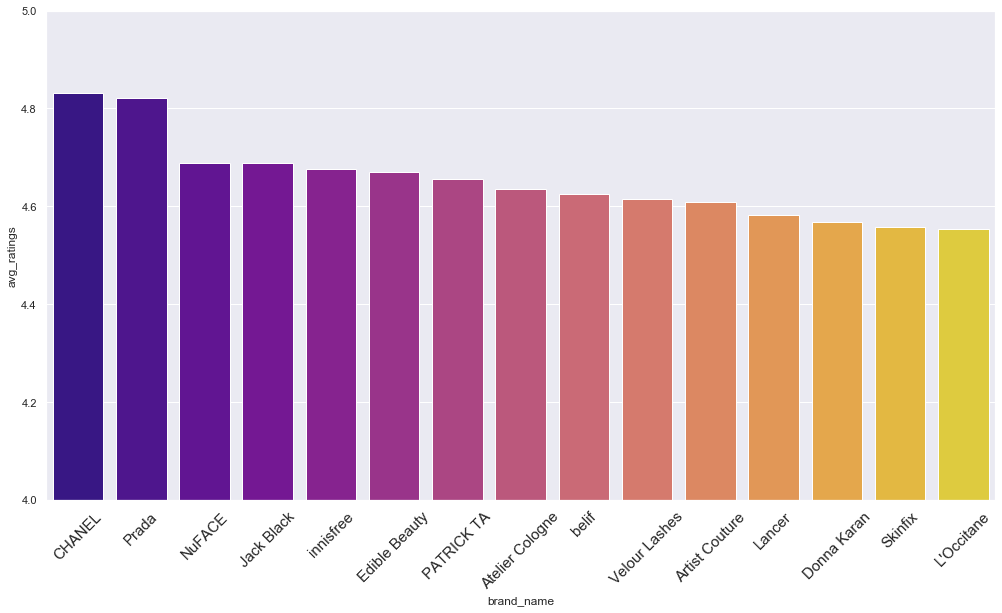

In [44]:
#ratings range from 4.55 to 4.83
brand_avg_rates = brand_avg_rating(df_normal)
top_15_brand = sorted(brand_avg_rates,key=lambda y: y[1], reverse = True)[0:15]
df_brand_ratings= pd.DataFrame(top_15_brand, columns=['brand_name','avg_ratings'])

import seaborn as sns
import matplotlib.pyplot as plt
f, ax1 = plt.subplots(1, 1, figsize=(17, 9), sharex=True)
plt.ylim(4.0,5.0)
plt.xticks(rotation=45,fontsize=15)
sns.barplot(x=df_brand_ratings['brand_name'], y = df_brand_ratings['avg_ratings'],palette='plasma')

<h3>4) distribution of all the products</h3>

Text(0.5, 1.0, 'Boxplot of price')

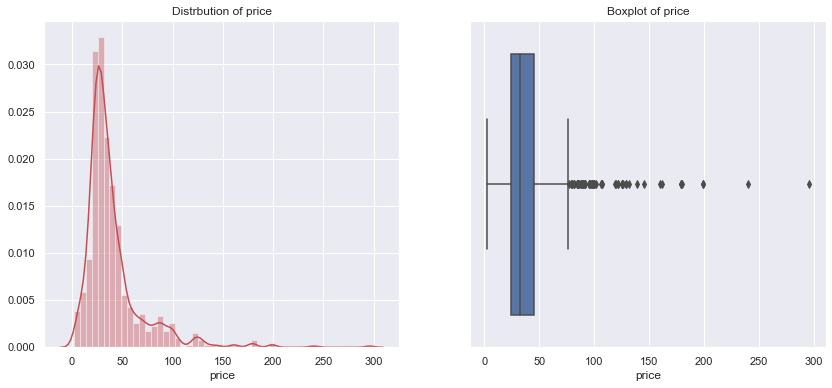

In [47]:
#price range from less than 5 dollars to more than 300
#the mean is around 30 dollars, and there're a lot of outliers
f, ax = plt.subplots(1,2,figsize=(14,6))
ax1,ax2 = ax.flatten()
sns.distplot(df_normal['price'].fillna(df_normal['price'].mean()),color='r',ax=ax1)
ax1.set_title('Distrbution of price')
sns.boxplot(x = df_normal['price'], ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Boxplot of price')

In [54]:
def get_top_15_brands(text):
    output = list()
    for i in range(len(top_15_brand)):
            brand_name = top_15_brand[i][0]
            output.append(brand_name)
    return output    

In [55]:
def brand_avg_price(text): #return a tuple of brands and their corresponsing average prices
    brand_list = get_top_15_brands(top_15_brand)
    brand_avg_price = list()
    for i in brand_list:
        avg_price = (text[text['brand_name'] == i]['price'].sum())/(text[text['brand_name'] == i]['price'].count())
        brand_avg_price.append((i,avg_price))
    return brand_avg_price

<h3>5) Highest rating brands with their average prices</h3>

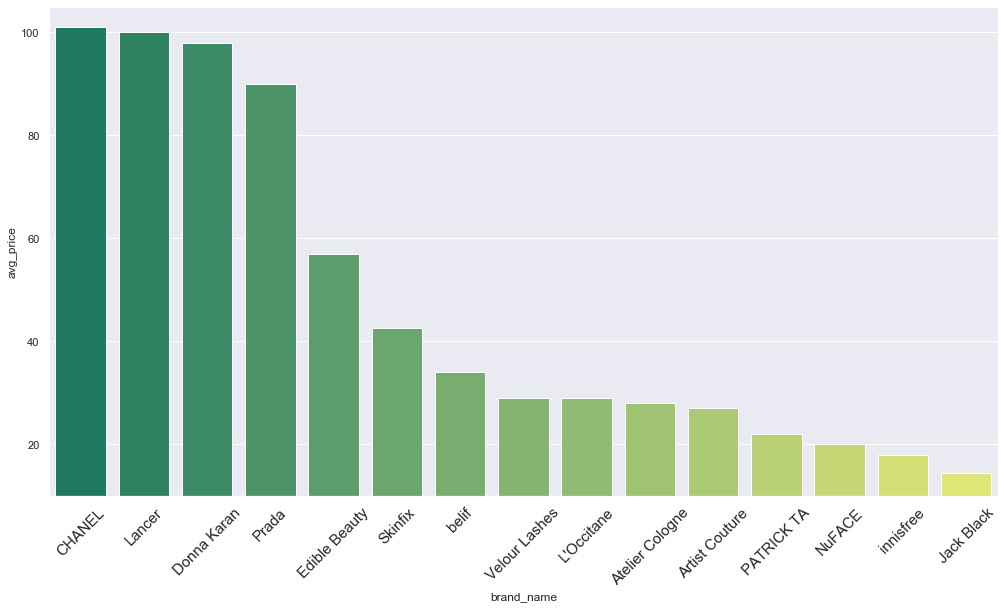

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
brand_price = brand_avg_price(df_normal)
sorted_brand_price=sorted(brand_price,key=lambda y: y[1], reverse = True)
df_brand_price= pd.DataFrame(sorted_brand_price, columns=['brand_name','avg_price'])

f, ax1 = plt.subplots(1, 1, figsize=(17, 9), sharex=True)
plt.ylim(10,105)
plt.xticks(rotation=45,fontsize=15)
sns.barplot(x=df_brand_price['brand_name'], y = df_brand_price['avg_price'],palette='summer')

<h3>6) two plots with most expensive brands and least expensive brands </h3>

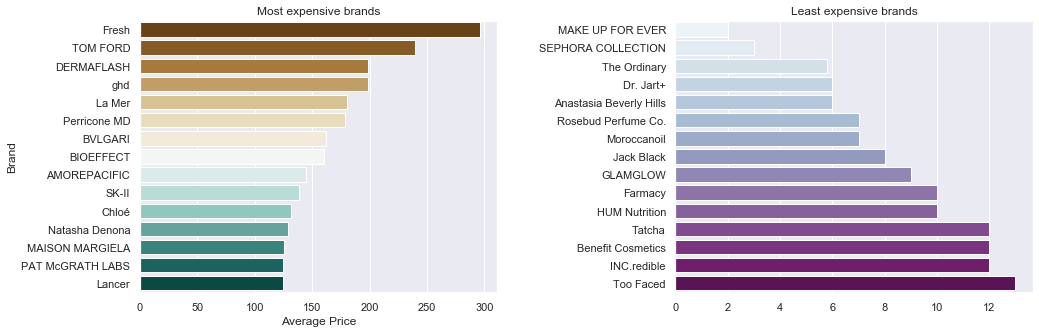

In [58]:
fig,ax = plt.subplots(1,2,figsize=(16,5))
ax1,ax2 = ax.flatten()

cnt = df_normal.groupby(['brand_name'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette= 'BrBG',ax=ax1)
ax1.set_title('Most expensive brands')
ax1.set_ylabel('Brand')
ax1.set_xlabel('Average Price')
cnt = df_normal.groupby(['brand_name'])['price'].min().sort_values(ascending=True).to_frame()[:15]
sns.barplot(x = cnt['price'], y = cnt.index, palette = 'BuPu',ax=ax2)
ax2.set_title('Least expensive brands')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.5)

<h3>7) relation between price and average ratings</h3>

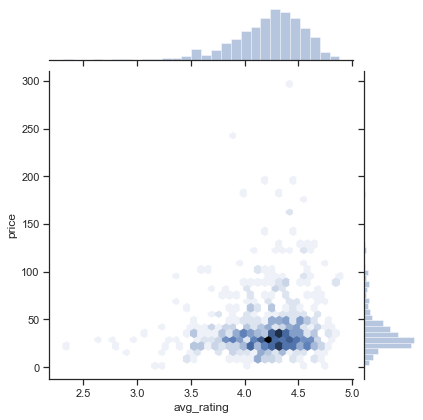

In [61]:
sns.set(style="ticks")
sns.jointplot( x = df_normal['avg_rating'],y = df_normal['price'],kind="hex", color="b")

<h3>8) relation between Vader Score and average ratings</h3>

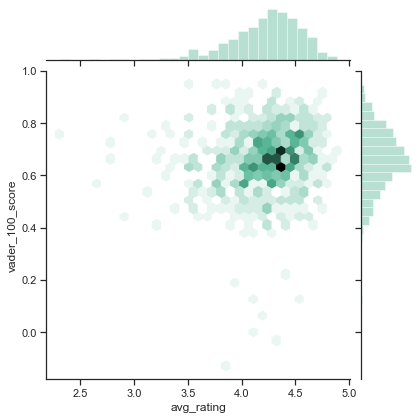

In [62]:
sns.set(style="ticks")
sns.jointplot( x = df_normal['avg_rating'],y = df_normal['vader_100_score'],kind="hex", color="#4CB391");

<h3>9) rating & price for both allure and non-allure products</h3>

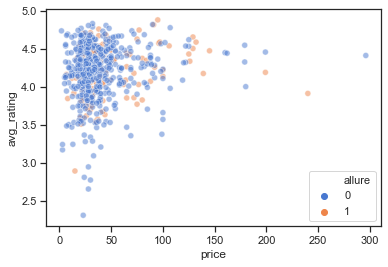

In [63]:
sns.scatterplot(x="price", y="avg_rating", hue="allure", 
            sizes=(6, 10), alpha=.5, palette="muted",
            data=df_normal)

<h3>10) top 15 brands with their corresponsing five_star percentages</h3>

In [64]:
df_five_star = df_normal[['brand_name','fivestar_pct']]
def brand_five_star(text):
    brand_list = get_top_15_brands(top_15_brand)
    brand_five_star = list()
    for i in range(len(text)):
        if text.iloc[i]['brand_name'] in brand_list:
            name = text.iloc[i]['brand_name']
            five_star = text.iloc[i]['fivestar_pct']
            brand_five_star.append((name,five_star))
    return brand_five_star

In [67]:
# !pip install squarify

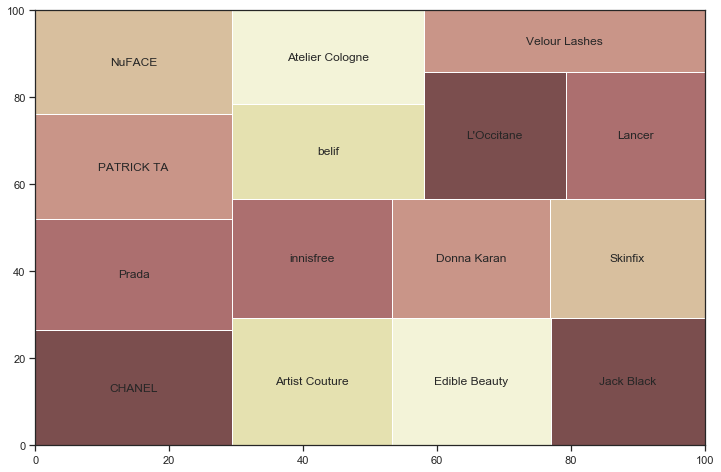

In [68]:
#percentage of five star of CHANEL is highest
df_brand_five = pd.DataFrame(brand_five_star(df_five_star), columns = ['brand_name','fivestar_pct'])
import squarify
cnt = df_brand_five.groupby(['brand_name',])['fivestar_pct'].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(12,8))
squarify.plot(cnt['fivestar_pct'].fillna(0.1),color=sns.color_palette('pink'),label=cnt.index)

<h3>11) boxplot of category and their total_reviews</h3>

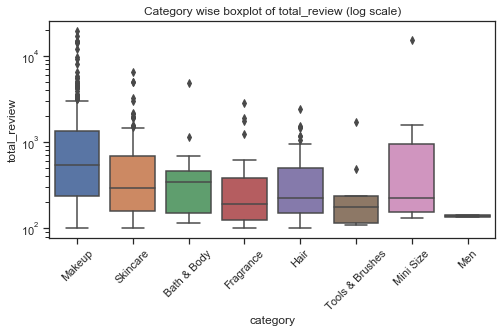

In [69]:
plt.figure(figsize=(8,4))
sns.boxplot(x = df_normal['category'], y = df_normal['total_review'])
plt.yscale("log")
plt.title('Category wise boxplot of total_review (log scale)')
plt.xticks(rotation=45);

<h1>PART IV: MACHINE LEARNING AND PREDICTION
</h1>

* Note: we first did modeling with 240 allure vs. 240 non-allure balanced dataset. However, the performance didn't go well. So then we enlarged our dataset to 240 allure vs. 1200 non-allure products and achieved better performance.

* Please refer to <strong>ML-version1.ipynb</strong> if you want to see the results of the small dataset. All the following codes are applied on the enlarged dataset.

In [12]:
import pandas as pd
from sklearn.utils import shuffle
import numpy as np 
import pylab 
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn')
%matplotlib inline

In [13]:
import warnings
warnings.filterwarnings('ignore')

<h3>Step1: Pre-process data and shuffle</h3>

In [14]:
df_all

,brand_name,product_name,category,subcategory,loves,price,total_review,avg_rating,recommended_count,vader_100_score,onestar_pct,twostar_pct,threestar_pct,fourstar_pct,fivestar_pct,allure
product_id,,,,,,,,,,,,,,,,
P45874456,FENTY BEAUTY by Rihanna,Mattemoiselle Plush Matte Lipstick,Makeup,Lip,321206,18.0,2215,4.3869,1922,0.695798,0.041986,0.046050,0.073589,0.159819,0.678555,1
P437290,Charlotte Tilbury,Charlotte's Genius Under Eye & Face Magic Sett...,Makeup,Face,15496,45.0,66,4.2576,54,0.574662,0.045455,0.090909,0.045455,0.196970,0.621212,1
P263504,Urban Decay,All Nighter Long-Lasting Makeup Setting Spray,Makeup,Face,489054,33.0,9548,4.4152,3026,0.545100,0.049434,0.037809,0.054252,0.165165,0.693339,1
P427517,Benefit Cosmetics,BADgal BANG! Volumizing Mascara,Makeup,Eye,48109,25.0,4372,3.7591,2998,0.568927,0.124886,0.102242,0.118939,0.196706,0.457228,1
P424149,HUDA BEAUTY,Desert Dusk Eyeshadow Palette,Makeup,Eye,239821,65.0,1971,4.4434,1704,0.729269,0.041096,0.045155,0.057331,0.142060,0.714358,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P383182,NuFACE,Trinity Wrinkle Reducer Attachment,Skincare,High Tech Tools,2499,149.0,6,3.8333,2,0.269848,0.000000,0.166667,0.166667,0.333333,0.333333,0
P433141,Nurse Jamie,Face Wrap Skin Perfecting Silicone Mask,Skincare,High Tech Tools,2089,30.0,7,3.8571,4,0.642636,0.000000,0.000000,0.428571,0.285714,0.285714,0
P387138,NuFACE,Mini Facial Toning Device,Skincare,High Tech Tools,9949,199.0,48,3.9792,20,0.633850,0.125000,0.041667,0.104167,0.187500,0.541667,0


In [15]:
df_model = df_all.drop(['brand_name','product_name','category','subcategory'],axis=1)

In [16]:
df_model = shuffle(df_model)

<h3>Step2: check correlation</h3>

Note that they are relatviely low. The exceptions lie in total_review vs. loves and avg_rating vs. fivestar_pct/onestar_pct. However, we still keep these features due to limit of features.

In [17]:
df_model.corr()

,loves,price,total_review,avg_rating,recommended_count,vader_100_score,onestar_pct,twostar_pct,threestar_pct,fourstar_pct,fivestar_pct,allure
loves,1.000000,-0.093259,0.756063,0.089548,0.686115,0.036738,-0.090982,-0.044332,-0.035492,0.054440,0.051896,0.184519
price,-0.093259,1.000000,-0.093757,0.041754,-0.081327,-0.017938,0.027029,-0.029781,-0.070988,-0.138246,0.110982,0.051310
total_review,0.756063,-0.093757,1.000000,0.063045,0.722742,0.048049,-0.072921,-0.035760,-0.024680,0.080203,0.018003,0.121326
avg_rating,0.089548,0.041754,0.063045,1.000000,0.063649,0.062699,-0.826988,-0.576492,-0.305352,-0.074176,0.875821,0.035403
recommended_count,0.686115,-0.081327,0.722742,0.063649,1.000000,0.032685,-0.079454,-0.041227,-0.013698,0.096666,0.009132,0.220707
vader_100_score,0.036738,-0.017938,0.048049,0.062699,0.032685,1.000000,-0.050039,-0.057174,-0.046148,0.069519,0.029422,0.018206
onestar_pct,-0.090982,0.027029,-0.072921,-0.826988,-0.079454,-0.050039,1.000000,0.189549,-0.033343,-0.141600,-0.541318,-0.045740
twostar_pct,-0.044332,-0.029781,-0.035760,-0.576492,-0.041227,-0.057174,0.189549,1.000000,0.070779,-0.045208,-0.508351,-0.023563
threestar_pct,-0.035492,-0.070988,-0.024680,-0.305352,-0.013698,-0.046148,-0.033343,0.070779,1.000000,-0.016953,-0.438199,0.010625
fourstar_pct,0.054440,-0.138246,0.080203,-0.074176,0.096666,0.069519,-0.141600,-0.045208,-0.016953,1.000000,-0.496819,0.034220


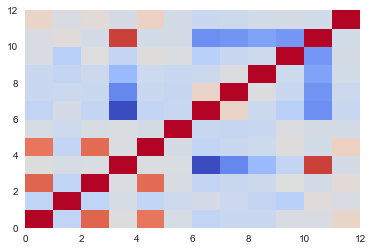

In [18]:
import matplotlib.pyplot as plot
plot.pcolor(df_all.corr(),cmap='coolwarm') #https://matplotlib.org/examples/color/colormaps_reference.html
plot.show()

In [19]:
df_copy = df_model.copy()  #copy df
df_model.describe()

,loves,price,total_review,avg_rating,recommended_count,vader_100_score,onestar_pct,twostar_pct,threestar_pct,fourstar_pct,fivestar_pct,allure
count,1.440000e+03,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,2.433533e+04,47.453583,467.988889,4.159291,183.661111,0.643670,0.081476,0.064756,0.082172,0.156193,0.615404,0.166667
std,6.001816e+04,45.971373,1412.385242,0.482104,544.010975,0.137006,0.095003,0.066678,0.073719,0.101113,0.167861,0.372807
min,0.000000e+00,2.000000,1.000000,1.000000,0.000000,-0.126300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.719250e+03,24.000000,21.000000,3.930325,9.000000,0.573917,0.021239,0.022777,0.040288,0.100000,0.515152,0.000000
50%,7.391000e+03,34.000000,81.000000,4.231200,32.000000,0.650914,0.055173,0.054105,0.073559,0.153896,0.620286,0.000000
75%,2.007500e+04,50.000000,322.250000,4.476725,136.000000,0.732661,0.104821,0.086992,0.107592,0.202176,0.718511,0.000000
max,1.220843e+06,370.000000,19457.000000,5.000000,11500.000000,0.985600,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000


<h3>Step3: Normalization</h3>

Note that the range of features differ a lot. We then use MinMaxScaler to normalize all features to increase accuracy.

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_model[['loves', 'price','total_review', 'avg_rating', 'recommended_count',
       'vader_100_score', 'onestar_pct', 'twostar_pct', 'threestar_pct',
       'fourstar_pct', 'fivestar_pct']] = scaler.fit_transform(df_model[['loves', 'price','total_review', 'avg_rating', 'recommended_count',
       'vader_100_score', 'onestar_pct', 'twostar_pct', 'threestar_pct',
       'fourstar_pct', 'fivestar_pct']])

<h3> Step4: train_test_split </h3>

Use train_test_split to divide the training and testing data. Divide 70% as training data and 30% as testing data.

In [21]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_model, test_size = 0.3)
x_train = train.iloc[0:,0:11]
y_train = train[['allure']]
x_test = test.iloc[0:,0:11]
y_test = test[['allure']]

<h3>Step5: use SMOTE to oversample</h3>

Our current enlarged data include 240 allure products and 1200 non-allure products. In order to balance this data, we apply SMOTE (Synthetic Minority Over-sampling Technique) on our training data. 

It creates synthetic (not duplicate) samples of the minority class. Hence making the minority class (1s) equal to the majority class (0s).

Before SMOTE, we have 852 0s and 156 1s. 
After SMOTE, we have 852 0s and 852 1s.

In [22]:
#!pip install imblearn

In [23]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [24]:
pd.Series(np.ravel(y_train)).value_counts()  #before SMOTE

0    836
1    172
dtype: int64

In [25]:
sm = SMOTE(random_state=12)
x_train, y_train = sm.fit_sample(x_train, np.ravel(y_train))

In [26]:
pd.Series(np.ravel(y_train)).value_counts() 

1    836
0    836
dtype: int64

<h3> Step6: machine learning </h3>

Try five different models to fit the data and tune hyperparameters. 
- Logistic Regression
- Decision Tree
- Random Forest
- Bagging
- Neural Network

Then we use two evaluation metrics: <strong>accuracy</strong> and <strong>AUC</strong> to compare all the models and choose the best one.

<h4>1) Logistic Regression</h4>

In [31]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(x_train,y_train)
logistic_predictions = model.predict(x_test)
actuals = np.array(y_test)
logistic_acc = model.score(x_test,actuals)
print('Accuracy:',logistic_acc)

Accuracy: 0.7083333333333334


In [32]:
from sklearn.metrics import roc_curve,auc
(fpr,tpr,thresholds)=roc_curve(y_test,logistic_predictions)
logistic_area=auc(fpr,tpr)
print('AUC:', logistic_area)

AUC: 0.5698125404007757


<h4>2) Decision Tree </h4>

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np

dtc = DecisionTreeClassifier()

#hyperparemeter tuning
parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4],
                  'max_features': [1, 2, 3, 4]}

grid_search = GridSearchCV(dtc, param_grid=parameter_grid, cv=5)

grid_search.fit(x_train,np.ravel(y_train))
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.7398552149432478
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 4, 'splitter': 'best'}


In [46]:
dt=DecisionTreeClassifier(criterion='gini', max_depth=3, max_features=4, splitter='best')
dt.fit(x_train,np.ravel(y_train))
dt_acc=dt.score(x_test,y_test)
print ('Accuracy:',dt_acc)

Accuracy: 0.7083333333333334


In [47]:
from sklearn.metrics import roc_curve,auc
dt_predictions=dt.predict(x_test)

(fpr,tpr,thresholds)=roc_curve(y_test,dt_predictions)
dt_area=auc(fpr,tpr)
print('AUC:', dt_area)

AUC: 0.6296056884292178


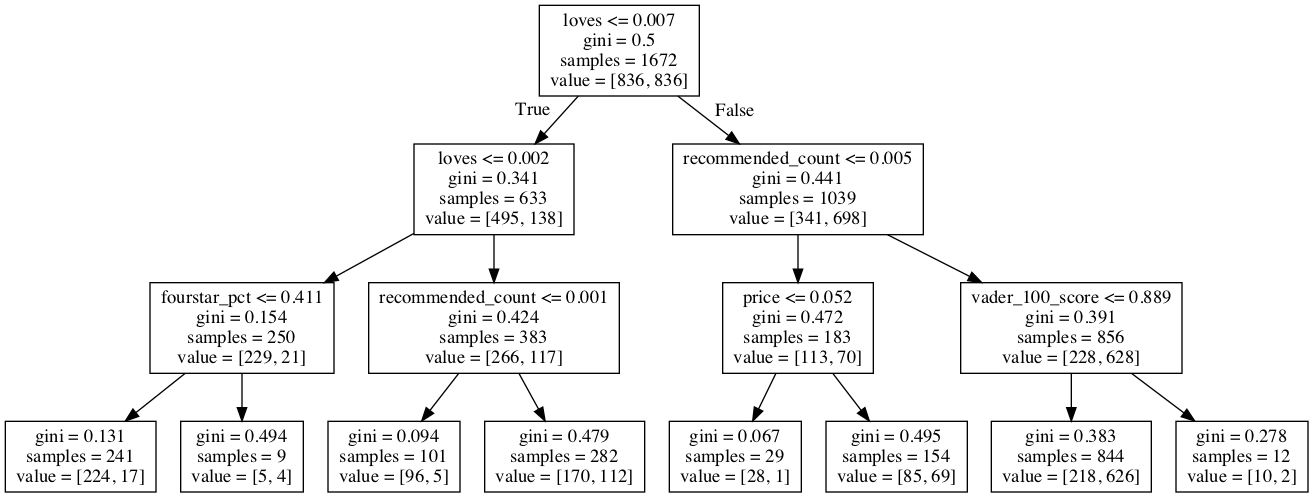

In [48]:
import pydotplus 
from IPython.display import Image
feature_names = [key for key in df_model if not key == 'allure']
dot_data = tree.export_graphviz(dt, out_file=None,feature_names=feature_names) 
#graph = pydotplus.graph_from_dot_data(dot_data) 

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)

Image(graph.create_png())

<h4>Interpret from the tree (normalize back)</h4>

Note that numbers in the tree are all after normalization, so we need to normalize these numbers back to get a better interpretation.

However, these numbers need to be manully inputted if the model changes.

In [49]:
def normalize_back(score,feature):
    result = score * (df_copy.describe()[feature]['max'] - df_copy.describe()[feature]['min']) + df_copy.describe()[feature]['min']
    return result

In [50]:
#depth 1
print('Depth 1: loves <=', normalize_back(0.007,'loves'))
#depth 2
print('Depth 2: loves <=', normalize_back(0.002,'loves'), ', recommended_count <=', normalize_back(0.005, 'recommended_count'))
#depth 3
print('Depth 3: fourstar_pct <=', normalize_back(0.411,'fourstar_pct'),', recommended_count <=', normalize_back(0.001, 'recommended_count'), ', price <=', normalize_back(0.052,'price'),', vader_100_score <=', normalize_back(0.013, 'vader_100_score'))


Depth 1: loves <= 8545.901
Depth 2: loves <= 2441.686 , recommended_count <= 57.5
Depth 3: fourstar_pct <= 0.411 , recommended_count <= 11.5 , price <= 21.136 , vader_100_score <= -0.1118453


<h4>3) Random Forest</h4>

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {
     'n_estimators':(20, 30, 50), #the number of trees
     'max_depth':(6,8,10,15,20),
     'min_samples_split': (2,4,8),
     'min_samples_leaf': (2,4,6,8,10)
}

model = GridSearchCV(RandomForestClassifier(),parameters,cv=5,iid=False)
model.fit(x_train,np.ravel(y_train))
print('Best score: {}'.format(model.best_score_))
print('Best parameters: {}'.format(model.best_params_))

Best score: 0.8696451872374654
Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 30}


In [54]:
rf= RandomForestClassifier(max_depth=20,min_samples_leaf=2,min_samples_split=4, n_estimators=30)
rf.fit(x_train,np.ravel(y_train))
rf_acc=rf.score(x_test,y_test)
print('Accuracy:', rf_acc)

Accuracy: 0.7916666666666666


In [55]:
from sklearn.metrics import roc_curve,auc
rf_predictions=rf.predict(x_test)
(fpr,tpr,thresholds)=roc_curve(y_test,rf_predictions)
rf_area=auc(fpr,tpr)
print('AUC:',rf_area)

AUC: 0.6611182934712346


<h3>Feature Importance</h3>

We can derive feature importance from the random forest model. The top 5 important features are the star rating percentages. Then follows our sentiment analysis (vader compound score) on all reviews.

([<matplotlib.axis.YTick at 0x1a4ffbe9b0>,
 <a list of 11 Text yticklabel objects>)

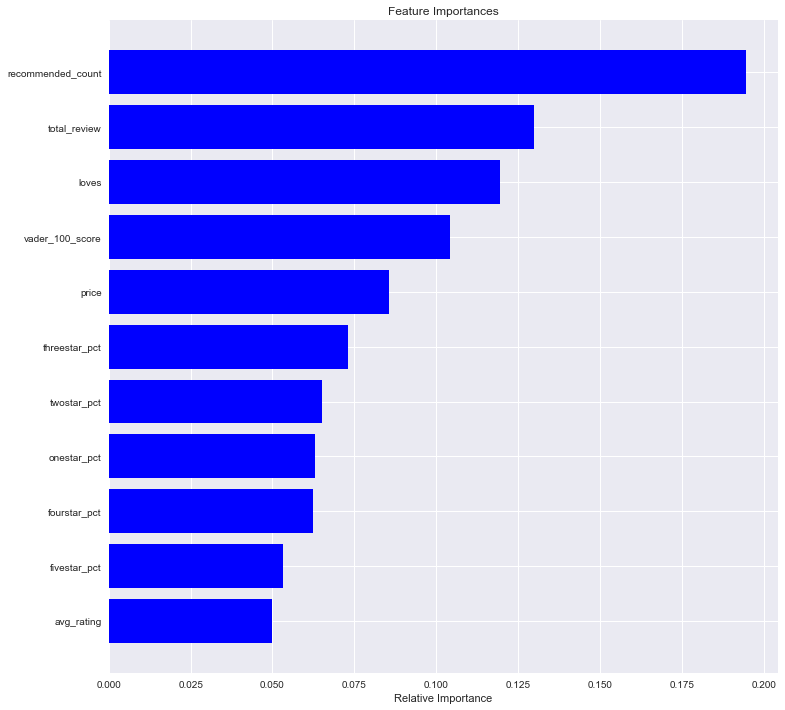

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.xlabel('Relative Importance')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])


<h4>4) Bagging</h4>

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

parameters = {
     'n_estimators':(20,30,40,50), #the number of trees
     'max_samples':(.30,.40,.50,1.0),
     'max_features':(2,4,6,8),
}

model = GridSearchCV(BaggingClassifier(),parameters,cv=5,iid=False)
model.fit(x_train, np.ravel(y_train))
print('Best score: {}'.format(model.best_score_))
print('Best parameters: {}'.format(model.best_params_))

Best score: 0.8833872553400661
Best parameters: {'max_features': 8, 'max_samples': 1.0, 'n_estimators': 30}


In [72]:
bg= BaggingClassifier(max_features=8,max_samples=1,n_estimators=30)
bg.fit(x_train,np.ravel(y_train))
bg_acc=bg.score(x_test,y_test)
print('Accuracy:',bg_acc)

Accuracy: 0.8425925925925926


In [73]:
from sklearn.metrics import roc_curve,auc
bg_predictions=bg.predict(x_test)
(fpr,tpr,thresholds)=roc_curve(y_test,bg_predictions)
bg_area=auc(fpr,tpr)
print('AUC:',bg_area)

AUC: 0.5


<h4>5) Neural network</h4>

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
parameters = {
    'learning_rate':["constant", "invscaling", "adaptive"],
    'solver': ('sgd','lbfgs','adam'),
    'activation': ('logistic','tanh','relu'),
    'hidden_layer_sizes': ((5,),(10,),(15,),(20,)),
    'max_iter': (600,800,1000)
}
gs = GridSearchCV(estimator = MLPClassifier(), param_grid=parameters,cv=5)
gs.fit(x_train,np.ravel(y_train))
print('Best score: {}'.format(gs.best_score_))
print('Best parameters: {}'.format(gs.best_params_))

Best score: 0.8271695415139868
Best parameters: {'activation': 'logistic', 'hidden_layer_sizes': (20,), 'learning_rate': 'invscaling', 'max_iter': 1000, 'solver': 'lbfgs'}


In [75]:
nn= MLPClassifier(activation='tanh',hidden_layer_sizes=20,learning_rate='invscaling',max_iter=1000,solver='lbfgs')
nn.fit(x_train,np.ravel(y_train))
nn_acc=nn.score(x_test,y_test)
print ('Accuracy:',nn_acc)

Accuracy: 0.7222222222222222


In [76]:
from sklearn.metrics import roc_curve,auc
nn_predictions=nn.predict(x_test)
(fpr,tpr,thresholds)=roc_curve(y_test,nn_predictions)
nn_area=auc(fpr,tpr)
print('AUC:',nn_area)

AUC: 0.6557853910795087


<h3>Step7: Compare all models performance </h3>

Based on the results, we choose <strong>Random Forest</strong> to be the final best model.

However, we notice that there are not much difference between each model and the hyperparameters would change each time we run the gridsearch again. We believe it is due to limitation of our data and features.

In [545]:
#!pip install PrettyTable

  Stored in directory: C:\Users\miley\AppData\Local\pip\Cache\wheels\80\34\1c\3967380d9676d162cb59513bd9dc862d0584e045a162095606
Successfully built PrettyTable


In [77]:
from prettytable import PrettyTable
t = PrettyTable(['Model', 'Accuracy', 'AUC'])
t.add_row(['Logistic Regression', "%.2f" % logistic_acc, "%.2f" % logistic_area])
t.add_row(['Decision Tree', "%.2f" % dt_acc, "%.2f" % dt_area])
t.add_row(['Random Forest', "%.2f" % rf_acc, "%.2f" % rf_area])
t.add_row(['Bagging', "%.2f" % bg_acc, "%.2f" % bg_area])
t.add_row(['Neural Network', "%.2f" % nn_acc, "%.2f" % nn_area])
print(t)

+---------------------+----------+------+
|        Model        | Accuracy | AUC  |
+---------------------+----------+------+
| Logistic Regression |   0.71   | 0.57 |
|    Decision Tree    |   0.71   | 0.63 |
|    Random Forest    |   0.79   | 0.66 |
|       Bagging       |   0.84   | 0.50 |
|    Neural Network   |   0.72   | 0.66 |
+---------------------+----------+------+


<h3>Step8: Examine our model result</h3>

<h4>1) ROC Curve</h4>

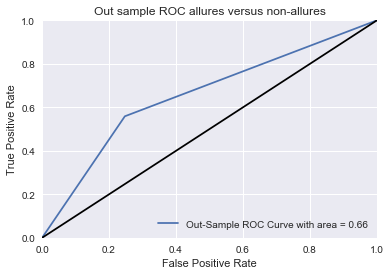

In [78]:
from sklearn.metrics import roc_curve,auc

plt.clf()
plt.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%rf_area)
plt.plot([0, 1], [0, 1], 'k')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Out sample ROC allures versus non-allures')
plt.legend(loc="lower right")
plt.show()

<h4>2) Confusion Matrix</h4>

In [79]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(np.ravel(y_test),rf_predictions)
cfm

array([[310,  54],
       [ 36,  32]])

In [80]:
def c_m_analysis(true,pred,threshold=0.5):
    tn, fp, fn, tp = cfm.ravel()
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fpr = fp/(fp+tn)
    tpr = tp/(tp+fn)
    f_score = 2*precision*tpr/(precision+tpr)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    print("Precision:\t\t\t%1.2f identified as allure are allure"%(precision))
    print("Recall/TPR:\t\t\t%1.2f proportion of actual allure identified"%(recall))
    print("False Positive Rate:\t\t%1.2f proportion of non-allure identified as allure"%fpr)
    print("f-score:\t\t\t%1.2f tradeoff between precision and recall"%(f_score))
    print("Accuracy:\t\t\t%1.2f how well the model has classified"%(accuracy))

In [81]:
c_m_analysis(y_test,rf_predictions,0.5)

Precision:			0.37 identified as allure are allure
Recall/TPR:			0.47 proportion of actual allure identified
False Positive Rate:		0.15 proportion of non-allure identified as allure
f-score:			0.42 tradeoff between precision and recall
Accuracy:			0.79 how well the model has classified


<h3>Step9: Prediction for MAN</h3>

In order to validate our model, we did prediction on MEN's products. We used all MEN's FRAGRANCE for prediction because it's the only category in Sephora that's exclusive for men. Other categories like skincare and makeup are available for both women and men and thus, might already be included in our modeling dataset.

In [551]:
def dataprocess(df):
    import pandas as pd
    df.set_index('product_id',inplace=True)
    df = df.drop(['Unnamed: 0','brand_name','product_name','category','subcategory','all_reviews'],axis=1)
    for i, row in df.iterrows():
        price = df['price'][i]
        if '(' in price:
            price = price.split('(')[0]
        df['price'][i]= price[1:]
    df['price']=df['price'].astype(float)
    df['onestar_pct']=df['onestar_count']/df['total_review']
    df['twostar_pct']=df['twostar_count']/df['total_review']
    df['threestar_pct']=df['threestar_count']/df['total_review']
    df['fourstar_pct']=df['fourstar_count']/df['total_review']
    df['fivestar_pct']=df['fivestar_count']/df['total_review']
    df=df.drop(['onestar_count','twostar_count','threestar_count','fourstar_count','fivestar_count'],axis=1)
    return df

In [556]:
df_man = pd.read_csv('all_man_with_score.csv')
df_man = df_man[(df_man['category'] == 'Fragrance') & (df_man['subcategory'] == 'Men')]

In [560]:
df_man

,loves,price,total_review,avg_rating,recommended_count,vader_100_score,onestar_pct,twostar_pct,threestar_pct,fourstar_pct,fivestar_pct
product_id,,,,,,,,,,,
P378660,5086,108.0,151,4.7682,26,0.742533,0.019868,0.013245,0.013245,0.086093,0.867550
P122635,1791,52.0,78,4.7949,4,0.770115,0.012821,0.012821,0.012821,0.089744,0.871795
P376737,13342,92.0,466,4.7039,63,0.763024,0.027897,0.019313,0.019313,0.087983,0.845494
P399255,432,84.0,5,4.6000,1,0.827700,0.000000,0.000000,0.000000,0.400000,0.600000
P180726,1898,92.0,114,4.8070,4,0.713739,0.017544,0.000000,0.017544,0.087719,0.877193
P165958,1465,68.0,39,4.7436,1,0.701323,0.000000,0.000000,0.000000,0.256410,0.743590
P163604,2480,63.0,74,4.2973,6,0.726123,0.067568,0.054054,0.081081,0.108108,0.689189
P430869,644,71.0,6,5.0000,6,0.600100,0.000000,0.000000,0.000000,0.000000,1.000000
P428500,7238,95.0,66,4.6970,63,0.655464,0.030303,0.015152,0.045455,0.045455,0.863636


In [558]:
df_man = dataprocess(df_man)

In [561]:
#normalize
df_man[['loves', 'price','total_review', 'avg_rating', 'recommended_count',
       'vader_100_score', 'onestar_pct', 'twostar_pct', 'threestar_pct',
       'fourstar_pct', 'fivestar_pct']] = scaler.fit_transform(df_man[['loves', 'price','total_review', 'avg_rating', 'recommended_count',
       'vader_100_score', 'onestar_pct', 'twostar_pct', 'threestar_pct',
       'fourstar_pct', 'fivestar_pct']])

In [577]:
# del df_man['prediction']

In [578]:
threshold = 0.50

predicted_proba = rf.predict_proba(df_man)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

In [579]:
df_man['prediction'] = predicted

In [580]:
result = df_man[df_man['prediction'] == 1].index

In [581]:
df_man['prediction'].value_counts()

0    88
1    10
Name: prediction, dtype: int64

In [582]:
result

Index(['P378660', 'P428500', 'P245710', 'P430348', 'P400652', 'P382751',
       'P4103', 'P382742', 'P398665', 'P380571'],
      dtype='object', name='product_id')

<h3>Step10: Validate our prediction</h3>

* LDA analysis on all men reviews （failed to cluster into two topics because words are similar)

But you can still refer to <strong>LDA code.ipynb</strong> to see our code.

* Compare to lists of other magazines

Please refer to our final report